In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# For the predictive models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBSklearn
from xgboost import XGBClassifier as XGB
import lightgbm as lgb

l'objectif du projet:

l'objectif du projet est predire si l'eau est potable ou non à

travers les différentes variables qui sont les caracteristiques de l'eau.





In [2]:
# importer le fichier
df  = pd.read_csv('water_potability.csv')

In [3]:
# afficher les cinq(5) premiers données
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
Potability = len(df[df['Potability'] == 1]['Potability'])
not_potability = len(df[df['Potability'] == 0]['Potability'])
potability_perc = round(Potability/len(df)*100,1)
not_potability_perc = round(not_potability/len(df)*100,1)

print('eau potable est de: {} ({}%)'.format(Potability , potability_perc))
print('eau non potable est de : {} ({}%)'.format(not_potability, not_potability_perc))


eau potable est de: 1278 (39.0%)
eau non potable est de : 1998 (61.0%)


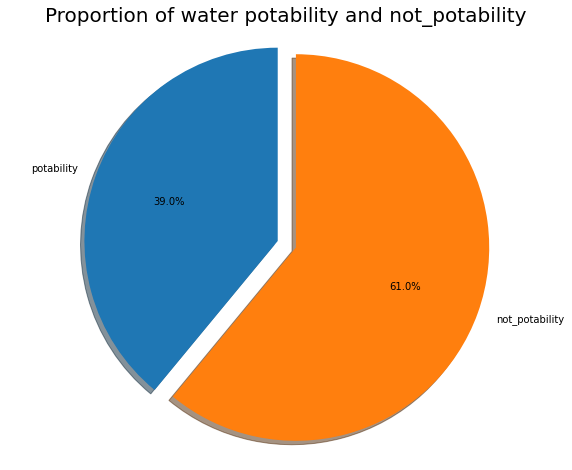

In [11]:
labels = 'potability', 'not_potability'
sizes = [df.Potability[df['Potability']==1].count(), df.Potability[df['Potability']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of water potability and not_potability", size = 20)
plt.show()

39% de l'eau est potable

61% de l'eau est non potable 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2327136a0>,
      dtype=object)

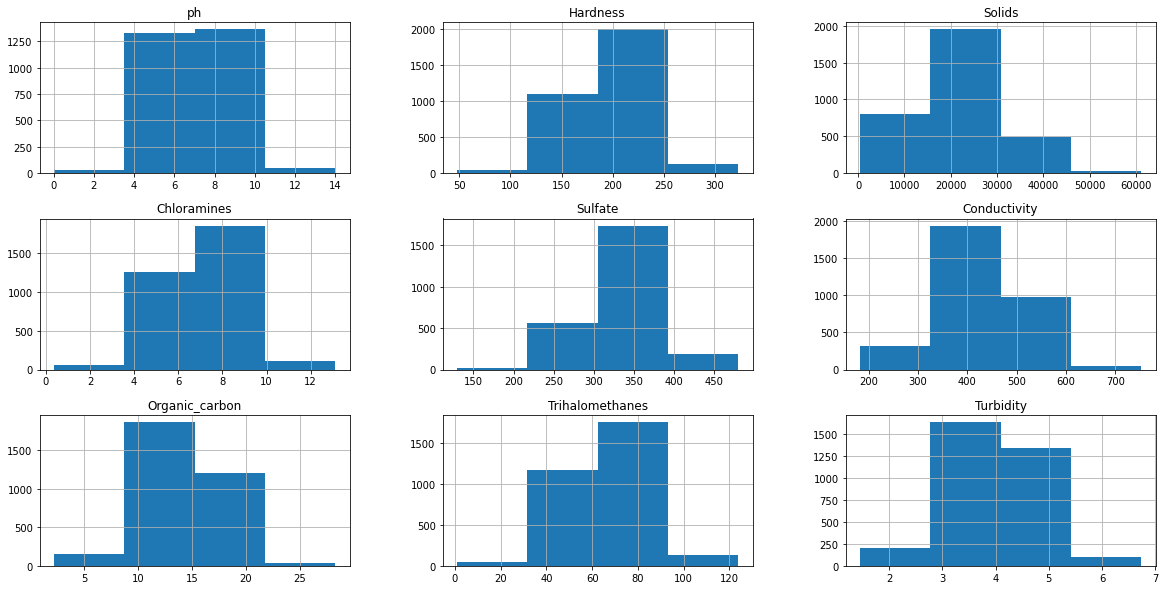

In [12]:
df.hist(column=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity' ], bins=4, figsize=(20,10))

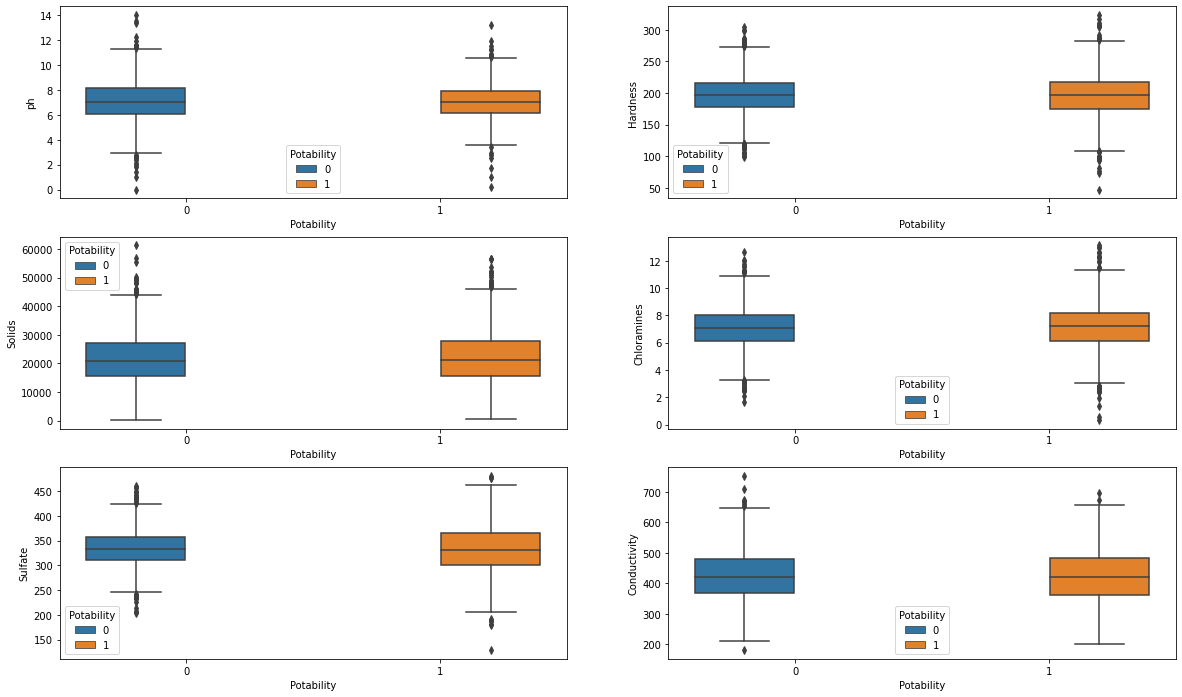

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='ph',x = 'Potability', hue = 'Potability',data = df, ax=axarr[0][0])
sns.boxplot(y='Hardness',x = 'Potability', hue = 'Potability',data = df , ax=axarr[0][1])
sns.boxplot(y='Solids',x = 'Potability', hue = 'Potability',data = df, ax=axarr[1][0])
sns.boxplot(y='Chloramines',x = 'Potability', hue = 'Potability',data = df, ax=axarr[1][1])
sns.boxplot(y='Sulfate',x = 'Potability', hue = 'Potability',data = df, ax=axarr[2][0])
sns.boxplot(y='Conductivity',x = 'Potability', hue = 'Potability',data = df, ax=axarr[2][1])

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [15]:
df['ph'] = imputer.fit_transform(df[['ph']])

df['Sulfate'] = imputer.fit_transform(df[['Sulfate']])

df['Trihalomethanes'] = imputer.fit_transform(df[['Trihalomethanes']])

In [16]:
#verification
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Modèle

In [17]:
y = df["Potability"]
X = df.drop(["Potability"], axis = 1)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (2620, 9)
Test set: (656, 9)


In [23]:
# Models
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred= model1.predict(X_test)

In [25]:
from sklearn import metrics #accuracy measure
acc= metrics.accuracy_score(y_test, y_pred)
acc

0.6295731707317073

In [29]:
cm= metrics.confusion_matrix(y_test,y_pred)
cm

array([[413,   0],
       [243,   0]])

In [31]:
# XGBClassifier
model2 = XGB()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
score  = model2.score(X_test,y_test)
score

0.6554878048780488

In [32]:
cm1= metrics.confusion_matrix(y_test,y_pred)
cm1

array([[365,  48],
       [178,  65]])

In [35]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.6722560975609756


In [36]:
cm2= metrics.confusion_matrix(y_test,y_pred)
cm2

array([[365,  48],
       [178,  65]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.5762195121951219


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB 
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.6204268292682927


In [ ]:
model3 = GBSklearn()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
score = model3.score(X_test,y_test)
score

0.6570121951219512

In [37]:
from sklearn.model_selection import GridSearchCV
  
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    'max_features': ['auto'],
    'criterion' :['gini']
}

  
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [320, 330, 340], 'random_state': [0]})

In [38]:
# affichons les meilleurs paramètres
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 340,
 'random_state': 0}

In [48]:
# les meilleurs estimateurs
model = grid.best_estimator_

In [50]:
grid_predictions = model.predict(X_test)

In [49]:
grid_score = model.score(X_test,y_test)
grid_score

0.6875

In [52]:
cm3 = confusion_matrix(y_test,grid_predictions)
cm3

array([[385,  28],
       [177,  66]])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       413
           1       0.70      0.27      0.39       243

    accuracy                           0.69       656
   macro avg       0.69      0.60      0.59       656
weighted avg       0.69      0.69      0.64       656



[ 471  498  526  553  580  608  635  662  690  717  744  772  799  827
  854  881  909  936  963  991 1018 1045 1073 1100 1127 1155 1182 1209
 1237 1264 1291 1319 1346 1373 1401 1428 1455 1483 1510 1537 1565 1592
 1619 1647 1674 1701 1729 1756 1783 1811 1838 1865 1893 1920 1947 1975
 2002 2029 2057 2084 2111 2139 2166 2193 2221 2248 2275 2303 2330 2358]


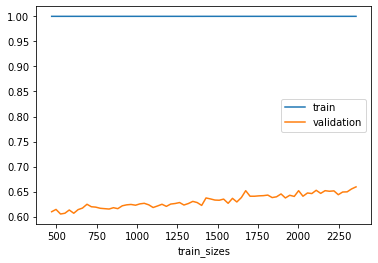

In [53]:
# learning curves
from sklearn.model_selection import learning_curve
N, training_scores, val_scores = learning_curve(RandomForestClassifier(),X_train,y_train,train_sizes=np.linspace(0.2, 1.0, 70),cv=10)
print(N)
plt.plot(N,training_scores.mean(axis=1),label='train')
plt.plot(N,val_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

# Conclusion
* le score du modèle n'evolu pas  à partir de 600 points cela montre que 
* le modèle a atteint son niveau de performance. 

J'ai entrainé la dataset avec 5 modéles: 
* Logistic Regression : avec un score d'accuracy de 0.6295
* Gradient Boosting Classifier : avec un score d'accuracy de 0.6570
* Extreme Gradient Boosting (XGBoost) : avec un score d'accuracy de 0.655
* KNeighborsClassifier : avec un score d'accuracy de 0.5762
* RandomForestClassifier: avec un score d'accuracy de 0.6722
        
Donc, d'aprés avoir regler les hyperparamètre nous avons trouver un meilleur accuracy de 0.69. RandomforestClassifier est le  meilleur modéle pour notre dataset.

# Nom et Prenom

* Diallo Billo